# Utilising LDA for topic modelling of UC3M online news 
-----
**<span style='color:Gray'>Jupyter Notebook TFM Pere</span>**

-----

# Structure
0. **[Theory](#Structure)**

>0.1.**[Why topic modelling](#Loading_and_general_preprocessing)**

>0.2.**[Preprocessing](#Loading_and_general_preprocessing)**

>0.3.**[LDA Logic, parameters and hyper-parameters](#Loading_and_general_preprocessing)**

1. **[Load requirements](#Structure)**  

2. **[General preprocessing](#Loading_and_general_preprocessing)**

3. **[N-grams analysis](#Gensim_Application)**

4. **[Sklearn Application](##Scikit-learn_LDA:_<span_style='color:Gray'>sklearn.LatentDirichletAllocation()</span>)**

>4.1.**[Pipeline trainnig]()**

>4.2.**[Analysis]()**

5. **[Gensim Application](#Gensim_Application)**

>5.1.**[Preprocessing]()**

>5.2.**[Trainnig]()**

>5.3.**[Analysis]()**

6. **[Results](#Gensim_Application)**

# Review of LDA

## Why topic Modelling 

Often, like in this application, we deal with a huge ammounts of text data in the form of news, research papers, social media post, unlabeled client service questions (Notice our case in not particularly big at all, < 10K words).

We need a way to understand, organise and label these documents, because looking one by one is not worth it, but still a one-fits-all approach can be a very bad solution. 

Think of topic modelling as clustering but instead of vectors/variables we have collections of words (texts/documents) that we want to group together in such a way that each group represents a topic in a document. 

## Feature selection 

Since topic modelling is about grouping documents, and we want to group documents that speak about the same, we need to focus on the words that have a clear meaning. 

Preprocessing is about removing words without meaning, and even get rid of the words that do not have a lot of meaning or are not helpful to differenciate the topics since they appear in almost all the documents. 


## LDA Probabilistic Modelling: 

(Hyperparameters and loss functions in red, because the objective is to understand them)

* **Latent**: Means we don't know it (the topics), but "know" it exists.
* **Dirilichet**: It is the distribution of the expected values ($P(T = K)$) of the topics and the words (https://en.wikipedia.org/wiki/Dirichlet_distribution).
* **Allocation**: It means that LDA will be about allocating topics to the documents and words to topics. 


#### **I. Graphical model**:

The graphical model exhibits the probabilistic process of generating a document. The objective of LDA is identify the estimates that maximise the likelihood of getting the same documents, in the context of Bayesian reasoning (Uncertainty around the real parameters defined by a distribution function).  

**Graphical model**

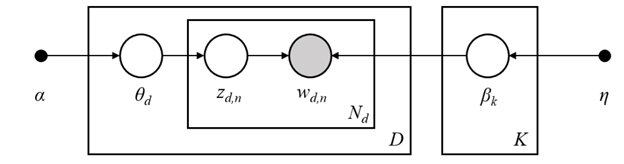

***What is this saying?***

Each document has a probability of belonging to each topic. So, without knowing anything about the words, we give a topic to each word based on sampling from the probabilities of each topic (Sampling from a Multinomial distribution). This way we have givena topic to each entry of the document. 

**Reasoning**

* So, we've given a topic to the document and a **topic to each word entry** (Actually we have given a distribution of topics to each document and to each of its words). 

* On the other side of the graph, we've given an estimate of the **% of words for each topic**.

**Solution**: The word that we give is the one that has more probability of being the correct one, and this probability is the the most likely word in the most likely topic (This is not actually true, is the word with the highest sum(P(Topic) x P(word | Topic)). 

The best model is the model that has the best estimates of P(Topic | Document) and P(word | Topic). These are the values that maximise the probability of replicating the same document (Maximise the likelihood of the data)

-----
----

Each topic has a frequency of words. So we randomly allocate a topic to each word based on this frequency. 

So, we've given this allocation to the words, and know because we know the frequency of each word in each topic, and know the allocation of topics (Assumption?), we put a word again to each "Space" (document index where a word should exist). 

The objective is that by means of this process we can generate the exact same document, or be as close as possible to it (That is, to maximise the likelihood of having the same document). 



-----
----


If we know this, for each word in the document we have a probability of belonging to each topic (We know the topic of each word).

With this info: 

Replicate the data based on this probabilities we know (P of Doc in topic), (P of word in topic).

We estimate also the probability of each word to belong to a topic, so, knowing the topic of each word (but not the actual word), we classify a word. 

The best fit is the fit that maximises the probability of returning / classifying the same exact document. 



What this is saying is that there are 2 factors defining the list of topics (Topic for each document), $w_{d,n}$. 

* The probability of a Document, $d$, being of a topic (topic is defined by zet)$zheta$</span> (so  <span style='color:Blue'>$alpha$</span> affects zheta)
* The probability of having a word in a topic $Beta$ (so <span style='color:Blue'>$eta$</span>  affects beta)

The probabilities above themselves are not a fixed parameters in our eyes, for us they're random variables. Our uncertainty around these population parameters is defined with the Dirilichet Distribution (*Distribution of distributions*: Defines the probability of a variable having a probability).

So, since known the topic the probability of the document does not add information (assumption) the probability of a word in a document, knowing alpha and eta is: 

$$ sum(P(w|t)xP(t|d)) = sum(zheta_{t,d}*(phi_{wt}))$$

So what we need to do is to update our priors. That is, to estimate the population parameters by identifying the parameters that maximise the likelihood function (parameters that make more probable to extract the real data). 

**How do we estimate these parameters?**

I don't know, but I know Gibbs sampling, at leas in most LDA cases, is used. It consists 

**How does this ends up translating in grouping variables?**

I don't know

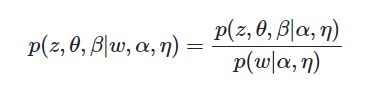



#### **II. How the model is trainned**:

**Sklearn library (Variational Bayes)**

**Gensim library (Variational Bayes)**

I think in gensim you can choose, but we will train it with variational Bayes. 

**Another alternative is to use Gibbs sampling but is not available in neihter sklearn not Gensim**



## Best resources: 

* https://www.youtube.com/watch?v=T05t-SqKArY
* https://www.youtube.com/watch?v=BaM1uiCpj_E
* https://medium.com/analytics-vidhya/topic-modeling-using-lda-and-gibbs-sampling-explained-49d49b3d1045
* https://scikit-learn.org/stable/modules/decomposition.html#latentdirichletallocation


In [ ]:
# Download required libraries
pip install pyLDAvis
pip install mglearn
pip install stop-words
pip install langdetect
pip install spacy
pip install joblib # Might not be required
!spacy download es_core_news_sm
pip install es-lemmatizer
pip install --upgrade jupyterlab jupyterlab-git

In [ ]:
# Code to clean the workspace if needed (I needed it becuase of memory issues)
for name in dir():
    if not name.startswith('_'):
        del globals()[name]        

In [2]:
# Code to load libraries
import sklearn as sk
import pandas as pd 
import numpy as np 
import mglearn
from stop_words import get_stop_words
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
import pyLDAvis
import pyLDAvis.sklearn
import warnings
from gensim.utils import simple_preprocess
from gensim import utils 
from collections import Counter
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from langdetect import detect
import spacy

C:\Users\Carmen\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading and general preprocessing

In [3]:
# This code loads the data an select only text that is online news and in Spanish  

## Filtering of the corpus I: Online news
df = pd.read_csv('UC3M_data.csv', skiprows = 6, encoding = 'utf-8')
data = df.loc[(df['Page Type'] == "news")]

## Filtering of the corpus II: Language 
data['Language'] = data['Snippet'].apply(detect)
data = data.loc[(data['Language'] == "es")].reset_index(drop  = True)


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Carmen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (63,88,89,96,97) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-3-2376714cd402>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Language'] = data['Snippet'].apply(detect)


The code is inspired fundamentally on three sources: 

Sources: 
    
* [Scikit learn LDA guide](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
* [Scikit learn "Working With Text Data" guide](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#where-to-from-here)
* [Blog I](https://blog.mlreview.com/topic-modeling-with-scikit-learn-e80d33668730)
* [Blog II](https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/)
* [Introduction to ML with python book (Last chapters)](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413)

Table of contents: 
    
* [LDA for news](#LDA_for_news)
* [LDA on Titles](#LDA_for_titles)

# Cleaning for both gensim and sklearn

- Lemmatization (Pre modelling)
- lowercase (SK pipeline)
- accents (SK pipeline)
- Extreme words (SK pipeline)


## Lemmatization 

NLTK does not have Spanish lemmatization. In this context Spacy offers a good alternative, and a function is crafted to build a pandas columns equivalent to the text column, but lemmatized

In [6]:
# The purpose of this code is to lemmatize (Convert to dictionary form) the words in each document, keeping the same format
# as with the text column (data['Snippet']).

nlp = spacy.load('es_core_news_sm')

def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

data['lemmatized'] = data['Snippet'].apply(lambda x: lemmatizer(x)) # Paralelisable?


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Remove numbers from text:
from gensim.parsing.preprocessing import strip_numeric
data['lemmatized'] = data['lemmatized'].apply(strip_numeric)

# Remove punctuation from text: 
from gensim.parsing.preprocessing import strip_punctuation
data['lemmatized'] = data['lemmatized'].apply(strip_punctuation)

# Remove multiple spaces: 
from gensim.parsing.preprocessing import strip_multiple_whitespaces
data['lemmatized'] = data['lemmatized'].apply(strip_multiple_whitespaces)

# Remove accents: (Not sure because it also conversts letter ñ to letter n)
import unidecode
data['lemmatized'] = data['lemmatized'].apply(unidecode.unidecode)

# Lowercase characters: 
data['lemmatized'] = data['lemmatized'].apply(np.char.lower)
df = data.lemmatized.values.tolist()

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# The objective of this chunk is to define the stopwords (Words without meaning). The stopwords come from the package NLPK, 
# and https://github.com/Alir3z4/stop-words/blob/master/spanish.txt, and my own 'expertise'.

# Note that the removal depends on the library and will be part of each. 

stop_words = stopwords.words('spanish')

stop_words_extension = get_stop_words('es')
stop_words.extend(stop_words_extension)

stop_words.extend(['Carlos', 'III', 'iii', 'Madrid', 'uc3m', 'UC3M', 'UC3', 'uc3', 'mas', 'tambien', 'tambien',
                   'ser', 'haber', 'Universidad', 'asimismo', 'carlos', 'universidad', 'iii', 'madrid', 'tras', 
                   'después', 'despues','of', '_', '-', '–', 'https', 'http', 'rt', 'm', 'uc'])


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# N-Grams Analysis 


## Count N-Grams 
The output of TfidfVectorizer is the TF-IDF matrix in sparse format (or actually the transpose of it in the format you seek). You can print out its contents e.g. like this:


In [9]:
# This code computes the N-grams (N in [1,2,3]) and plots them. It works independently of the rest of the code in this notebook

def cleanReviews(documents):
    cleanedReviews = []
    for document in documents:
        s = re.sub(r'@.,/\ºª;:', '', document)
        s = s.translate(str.maketrans('', '', string.punctuation))
#         s = re.sub(r'.', '', s)
#         s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [word for word in tokens if word not in ['alexa', 'echo', 'dot']]
        review = ' '.join(tokens)
        cleanedReviews.append(review)
    return(cleanedReviews)


def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace = 1)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()
    
def textTrends(documents):
    cleanedReviews = cleanReviews(documents)
    plotNgrams(cleanedReviews)

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


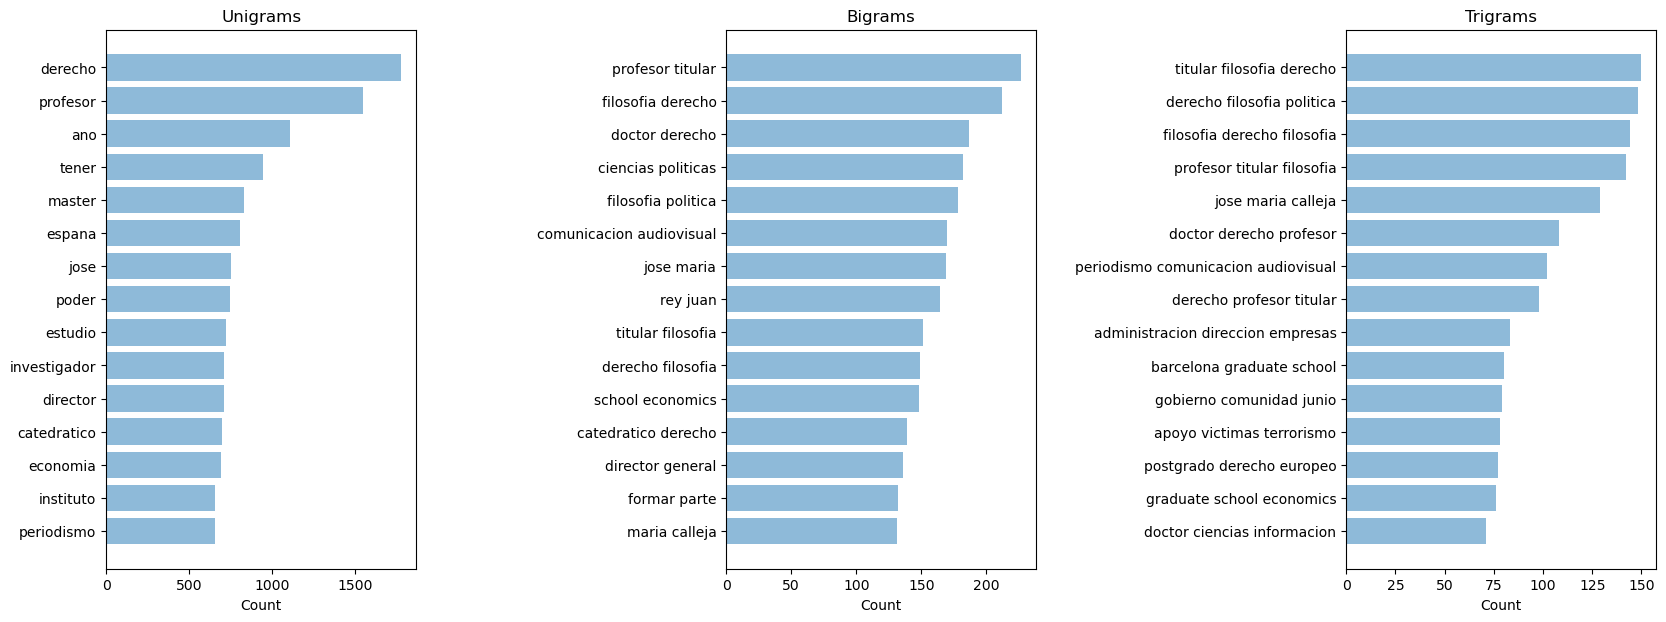

In [10]:
textTrends(data['lemmatized'])

In [ ]:

# # Code necessary to run the model on scikit learn and TF-IDF N-grams 
# tf_vectorizer = TfidfVectorizer(stop_words = stop_words, lowercase = True, strip_accents = 'ascii')
# tf = tf_vectorizer.fit_transform(data["lemmatized"])
# tf_feature_names = tf_vectorizer.get_feature_names()



## TF_IDF N-Grams 

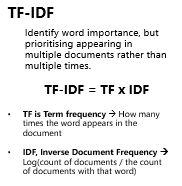


TF-IDF is about re-weight the counts into more suitable values. 

* TF (Term frequency): Count of the word (or sequence)
* IDF (Inverse Document Frequency): 

The transformation is done with sklearn TfidfVectorizer(). This function allows you to include also further preprocessing steps and tune hyperparameters. 

The output of TfidfVectorizer is the TF-IDF matrix in sparse format (or actually the transpose of it in the format you seek). You can print out its contents e.g. like this:

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Carmen\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubi

<AxesSubplot:title={'center':'Cummulated TF-IDF Unigram'}>

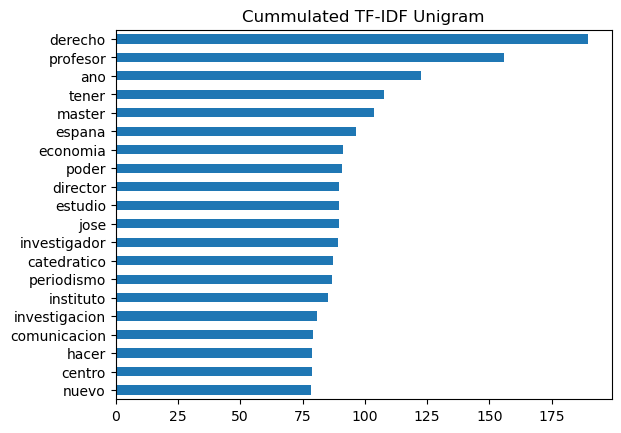

In [11]:
### Code to plot the cummulated TF-IDF unigram:

tf_vectorizer = TfidfVectorizer(stop_words = stop_words, lowercase = True, min_df = 0.0005, strip_accents = 'ascii')

tf = tf_vectorizer.fit_transform(data["lemmatized"])
tfidf = pd.DataFrame(tf.toarray())
tfidf.columns = tf_vectorizer.get_feature_names()
tfidf[tfidf.columns]

n = 20 # Define length of the graph
tfidf.apply(sum).sort_values(ascending = False)[0:n].sort_values(ascending = True).plot(kind = 'barh', title = 'Cummulated TF-IDF Unigram')

In [ ]:
tfidf.head(12)

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Cummulated TF-IDF Bigram'}>

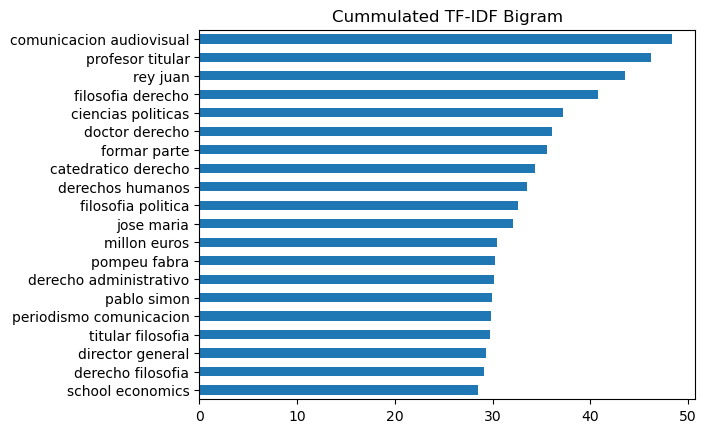

In [12]:
### Code to plot the cummulated TF-IDF Bigram: 

tf_vectorizer_bi = TfidfVectorizer(stop_words = stop_words, lowercase = True, ngram_range = (2,2), min_df = 0.0005, strip_accents = 'ascii')

tfbi = tf_vectorizer_bi.fit_transform(data["lemmatized"])
tfidf = pd.DataFrame(tfbi.toarray())
tfidf.columns = tf_vectorizer_bi.get_feature_names()
tfidf[tfidf.columns]

n = 20 # Define length of the graph
tfidf.apply(sum).sort_values(ascending = False)[0:n].sort_values(ascending = True).plot(kind = 'barh', title = 'Cummulated TF-IDF Bigram')

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Cummulated TF-IDF Trigram'}>

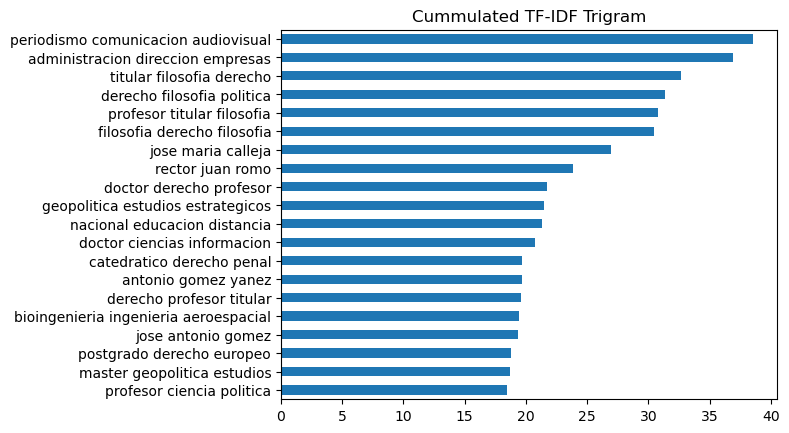

In [13]:
### Code to plot the cummulated TF-IDF Bigram: 

tf_vectorizer_bi = TfidfVectorizer(stop_words = stop_words, lowercase = True, ngram_range = (3,3), min_df = 0.0005, strip_accents = 'ascii')

tfbi = tf_vectorizer_bi.fit_transform(data["lemmatized"])
tfidf = pd.DataFrame(tfbi.toarray())
tfidf.columns = tf_vectorizer_bi.get_feature_names()
tfidf[tfidf.columns]

n = 20 # Define length of the graph
tfidf.apply(sum).sort_values(ascending = False)[0:n].sort_values(ascending = True).plot(kind = 'barh', title = 'Cummulated TF-IDF Trigram')

# Scikit-learn LDA: <span style='color:Gray'>sklearn.LatentDirichletAllocation()</span>

The advantages of scikit learn


Tunning process: 

1. Identify the a limit of interations for Variational Bayes
2. Identify the priors and number of components for two cases: 100% and 95% word cut. You can also use 90%
3. Look at the groupings (Probably worth doing this at the end when comparing with gensim approach) 
4. Reach a conclussion and make a choice
5. Repeat for Titles

## Trainning

In [ ]:
# Full pipeline hyperparameter tuning, considering processing steps as hyperparameters

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# tf_vectorizer = TfidfVectorizer(stop_words = stop_words, lowercase = True)
# tf = tf_vectorizer.fit_transform(data["lemmatized"])
# tf_feature_names = tf_vectorizer.get_feature_names()

text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words = stop_words, lowercase = True, strip_accents = 'ascii')),
        ('clf', LatentDirichletAllocation(random_state = 10))])

param_grid = {"clf__max_iter": range(10, 55, 5)}

# RandomizedSearchCV
# You can use RandomizedSearchCV(). However, I want to try all the k possible, don't want to miss there
gridsearch = GridSearchCV(text_clf, param_grid = param_grid, n_jobs = 7, verbose = 10)
# rs = RandomizedSearchCV(text_clf, param_grid, n_jobs = 7, n_iter = 10000, random_state = 10)
modelado = gridsearch.fit(data["lemmatized"])

In [23]:
modelado.cv_results_

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'mean_fit_time': array([31.19032826, 41.05395117, 48.16132207, 48.24189839, 55.37446413,
        66.29778843, 74.15298748, 81.21296535, 69.96237407]),
 'std_fit_time': array([ 0.15622348,  0.86319712,  3.1114052 ,  1.37149076,  0.22829584,
         0.59381375,  1.05638146,  0.73632836, 11.42205081]),
 'mean_score_time': array([1.19724541, 0.99136128, 0.97346864, 0.83857489, 0.87425466,
        0.94027677, 0.89714918, 0.85541258, 0.43905549]),
 'std_score_time': array([0.0426583 , 0.05078524, 0.06015927, 0.07248465, 0.05035144,
        0.08878535, 0.07529769, 0.12176363, 0.15780997]),
 'param_clf__max_iter': masked_array(data=[10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_iter': 10},
  {'clf__max_iter': 15},
  {'clf__max_iter': 20},
  {'clf__max_iter': 25},
  {'clf__max_iter': 30},
  {'clf__max_iter': 35},
  {'clf__max

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Running time (Seconds)')

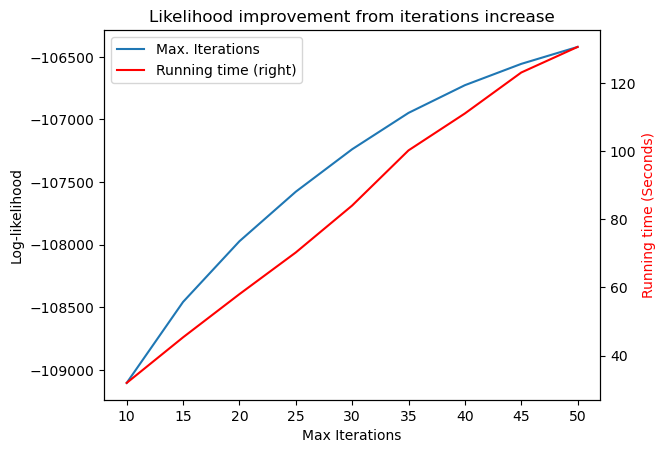

In [69]:
# Improvements: Axis content, maybe should start from 0. Maybe you can make it slightly better looking 


iterations = pd.DataFrame()

iterations['RunningTime'] = modelado.cv_results_['mean_fit_time'] + modelado.cv_results_['mean_score_time']
iterations['Loglikelihood'] = modelado.cv_results_['mean_test_score']
iterations.index = list(range(10, 55, 5))

iterations.Loglikelihood.plot(label = "Max. Iterations", legend = True, 
                              title = 'Likelihood improvement from iterations increase', xlabel  = 'Max Iterations', ylabel  = 'Log-likelihood')
iterations.RunningTime.plot(label = "Running time", legend = True, secondary_y = True, color = 'red').set_ylabel('Running time (Seconds)', color = 'red')


In [12]:
# Here we define the maximum number of iterations that are useful
max_iter = 25

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
list(np.linspace(0.01, 1.0, 5))

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.01, 0.2575, 0.505, 0.7525, 1.0]

In [ ]:
list(range(10, 60, 6))

In [35]:
# Full pipeline hyperparameter tuning, considering processing steps as hyperparameters

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

tf_vectorizer = TfidfVectorizer(stop_words = stop_words, lowercase = True)
tf = tf_vectorizer.fit_transform(data["lemmatized"])
tf_feature_names = tf_vectorizer.get_feature_names()

text_clf = Pipeline([
        ('vect', TfidfVectorizer(stop_words = stop_words, lowercase = True, strip_accents = 'ascii', max_df = 0.95, min_df = 0.05)),
        ('clf', LatentDirichletAllocation(random_state = 0, max_iter = max_iter))])

param_grid = {
#     "vect__max_df": [0.9, 0.92, 0.94, 0.95, 0.96, 0.98, 1.0], # ignore higher than given threshold in terms of proportion of documents
#     "vect__min_df": [0.0, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1], # ignore lower than given threshold in terms of proportion of documents
    "clf__doc_topic_prior": list(np.linspace(0.01, 1.0, 11)), # Alpha
    "clf__topic_word_prior": list(np.linspace(0.01, 1.0, 11)), # Eta
    "clf__n_components":  range(2, 14, 1)}

gridsearch = GridSearchCV(text_clf, param_grid = param_grid, cv = 3, n_jobs = 6, verbose = 10)
# rs = RandomizedSearchCV(text_clf, param_grid, n_jobs = 7, n_iter = 10000, random_state = 100)
modelado = gridsearch.fit(data["lemmatized"])

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 3 folds for each of 1452 candidates, totalling 4356 fits


In [170]:
a

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [68]:
modelado.cv_results_['param_clf__topic_word_prior']

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


masked_array(data=[0.01, 0.109, 0.20800000000000002, ..., 0.802, 0.901,
                   1.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object)

In [ ]:
results

In [393]:

# This code obtain the results of the grid search the way we need for plotting. 
# Good source:  https://sklearn-evaluation.readthedocs.io/en/stable/user_guide/grid_search.html  | https://scikit-learn.org/stable/modules/grid_search.html

gs = pd.DataFrame() 

gs['score'] = modelado.cv_results_['mean_test_score']
gs['n_components'] = modelado.cv_results_['param_clf__n_components']
gs['aplha'] = modelado.cv_results_['param_clf__doc_topic_prior']
gs['beta'] = modelado.cv_results_['param_clf__topic_word_prior']
gs
results = gs.sort_values(['n_components', 'score'], ascending = [False, False]).groupby('n_components').first()

# sns.relplot(x = "timepoint", y = "signal", hue = "event", kind = "line", data = fmri)

results = results.reset_index()
results = results.melt(id_vars = ['score'], value_vars=["aplha", "beta"])

a = gs['n_components'].unique().astype(int)
results['component'] = np.concatenate((a, a))

results

,score,variable,value,component
0,-14298.392097,aplha,1.000,2
1,-14464.856268,aplha,1.000,3
2,-14562.478415,aplha,1.000,4
3,-14603.103430,aplha,1.000,5
4,-14716.479284,aplha,1.000,6
5,-14790.746507,aplha,1.000,7
6,-14827.027204,aplha,0.901,8
7,-14890.904877,aplha,0.901,9
8,-14956.762703,aplha,0.802,10
9,-14968.996069,aplha,0.802,11


In [390]:
# results = results.sort_values(['n_components', 'score'], ascending = [False, False]).groupby('n_components').first()
# results = results.reset_index()
# results

,n_components,score,aplha,beta
0,2,-14298.392097,1.000,0.208
1,3,-14464.856268,1.000,0.109
2,4,-14562.478415,1.000,0.109
3,5,-14603.103430,1.000,0.109
4,6,-14716.479284,1.000,0.109
5,7,-14790.746507,1.000,0.109
6,8,-14827.027204,0.901,0.010
7,9,-14890.904877,0.901,0.010
8,10,-14956.762703,0.802,0.010
9,11,-14968.996069,0.802,0.010


In [ ]:
results = gs.sort_values(['n_components', 'score'], ascending = [False, False]).groupby('n_components').first()
results = results.reset_index()
results

# results.columns = ['component', 'score', 'aplha', 'beta']

from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line

(
    ggplot(results)
    + aes(x = "n_components", y = "score")
    + labs(
        title = "Maximum Log-likelihood score for each k components",
        subtitle = "dsa ceew cwe",
        caption = "Pere Fuster - UC3M",
        x = "Number of Topics",
        y = "Log-likelihood",
        color = "Prior Distributions")
    + geom_line(size = 1, color = "blue")
    + geom_point(size = 2, color = "green")

)

# https://realpython.com/ggplot-python/
# https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/#the-grammar-of-graphics


In [ ]:
pip install plotnine

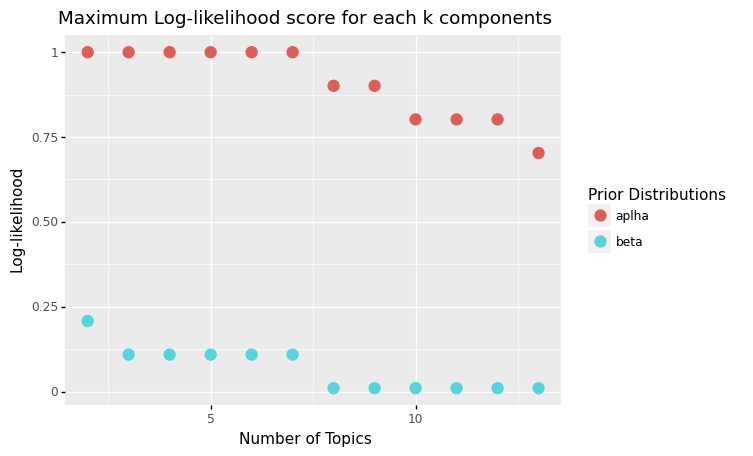

<ggplot: (134951085523)>

In [396]:

from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line

(
    ggplot(results)
    + aes(x = "component", y = "value", color = "variable")
    + labs(
        title = "Maximum Log-likelihood score for each k components",
        subtitle = "dsa ceew cwe",
        caption = "Pere Fuster - UC3M",
        x = "Number of Topics",
        y = "Log-likelihood",
        color = "Prior Distributions")
    + geom_point(size = 4)
)


In [201]:

tf_vectorizer = TfidfVectorizer(stop_words = stop_words, lowercase = True, strip_accents = 'ascii', max_df = 0.95, min_df = 0.05)
tf = tf_vectorizer.fit_transform(data["lemmatized"])
tf_feature_names = tf_vectorizer.get_feature_names()


In [202]:

model2 = LatentDirichletAllocation(random_state = 0, n_components = 2, max_iter = max_iter, doc_topic_prior = 1, topic_word_prior = 0.208)
model2.fit(tf)
sorting = np.argsort(model2.components_, axis = 1)[:, ::-1]


In [203]:

feature_names = np.array(tf_vectorizer.get_feature_names())
feature_names

mglearn.tools.print_topics(topics = range(0,2), feature_names = feature_names, sorting = sorting, topics_per_chunk = 5, n_words = 20)


topic 0       topic 1       
--------      --------      
derecho       tener         
profesor      poder         
ano           master        
periodismo    estudio       
jose          espana        
catedratico   investigador  
director      nuevo         
economia      hacer         
comunicacion  investigacion 
general       centro        
profesora     juan          
ademas        proyecto      
departamento  espanol       
politica      segun         
ciencias      grupo         
instituto     fundacion     
hacer         parte         
master        internacional 
espana        nacional      
internacional instituto     




In [204]:
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(model2, tf, tf_vectorizer, mds = 'tsne')
panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1     -60.312317  141.369629       1        1  51.129425
0      60.312561 -141.369141       2        1  48.870575, topic_info=             Term        Freq       Total Category  logprob  loglift
7         derecho  717.000000  717.000000  Default  30.0000  30.0000
30       profesor  675.000000  675.000000  Default  29.0000  29.0000
1             ano  554.000000  554.000000  Default  28.0000  28.0000
34          tener  481.000000  481.000000  Default  27.0000  27.0000
27     periodismo  375.000000  375.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
19  investigacion    0.220059  301.701075   Topic2 -10.1829  -6.5073
25          nuevo    0.221184  332.067964   Topic2 -10.1778  -6.5981
34          tener    0.221241  481.983523   Topic2 -10.1776  -6.9704
28          poder    0.220517  395.392267   Topic2 -10.1809  -6.7757
20   investigador    0.220257  357.337906   Topic2 -10.1820  -6.6756

[97 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         2  0.998988         ademas
1         2  1.000048            ano
2         2  1.000654    catedratico
3         1  0.999790         centro
4         2  0.999443       ciencias
5         2  0.998569   comunicacion
6         2  1.000724   departamento
7         2  0.999959        derecho
8         2  1.000588       director
9         2  0.999088       economia
10        1  0.990316         espana
10        2  0.007798         espana
11        1  0.997657        espanol
12        1  1.000202        estudio
13        1  1.000389      fundacion
14        2  0.997683        general
15        1  0.998602          grupo
16        1  0.976783          hacer
16        2  0.024496          hacer
17        1  0.526215      instituto
17        2  0.476689      instituto
18        1  0.997047  internacional
18        2  0.004189  internacional
19        1  0.997676  investigacion
20        1  0.999054   investigador
21        2  0.999030           jose
22        1  1.000444           juan
23        1  0.990328         master
23        2  0.010236         master
24        1  1.000199       nacional
25        1  0.999795          nuevo
26        1  0.998201          parte
27        2  0.999441     periodismo
28        1  0.999008          poder
29        2  1.001097       politica
30        2  0.999078       profesor
31        2  0.998196      profesora
32        1  0.999934       proyecto
33        1  0.999409          segun
34        1  1.000034          tener, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

# Gensim Application
----

dew

dew
d


In [14]:
data['lemmatized'] = data['lemmatized'].apply(np.char.lower)

df = data.lemmatized.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(df))
df_words

# The objective of this chunk is to define the stopwords (Words without meaning). The stopwords come from the package NLPK, 
# https://github.com/Alir3z4/stop-words/blob/master/spanish.txt, and my own 'expertise'

stop_words = stopwords.words('spanish')

stop_words_extension = get_stop_words('es')
stop_words.extend(stop_words_extension)

stop_words.extend(['Carlos', 'III', 'iii', 'Madrid', 'hacer', 'tener', 'uc3m', 'UC3M', 'UC3', 'uc3', 'ser', 'haber', 'Universidad', 'asimismo', 'carlos', 'universidad', 'iii', 'madrid', 'tras', 'después', 'despues','of', '_', '-', '–', 'https', 'http', 'rt'])


nlp = spacy.load('es_core_news_sm')

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams
# bigram = gensim.models.Phrases(data_words_nostops, min_count=5, threshold=100) # higher threshold fewer phrases.
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# def make_bigrams(texts):
#     return [bigram_mod[doc] for doc in texts]
# data_words_bigrams = make_bigrams(data_words_nostops) # Why??

data_lemmatized = lemmatization(data_words_nostops, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV'])


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [260]:


# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# [[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:122]]

In [227]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

# iterations (int, optional) – Maximum number of iterations through the corpus when inferring the topic distribution of a corpus.

import timeit

start = timeit.default_timer()

#Your statements here

stop = timeit.default_timer()

print('Time: ', stop - start)  

def compute_coherence_values(dictionary, corpus, texts):
    coherence_values = []
    model_list = []
    timings = []
    for iterations in range(6, 54, 4):
        
        start = timeit.default_timer()
        
        model = LdaMulticore(corpus = corpus, iterations = iterations, id2word = id2word, random_state = 10)
        
        stop = timeit.default_timer()
        time = stop - start
        timings.append(time)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, timings

# Source for time recording: https://stackoverflow.com/questions/5622976/how-do-you-calculate-program-run-time-in-python


Time:  1.7700000171316788e-05


In [230]:

model_list, coherence_values, timings = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = data_lemmatized)


In [ ]:
coherence = pd.DataFrame()
coherence['coherence_values'] = coherence_values
coherence.index = list(range(6, 54, 4))


In [ ]:
length = pd.DataFrame()
length['timings'] = timings
length.index = list(range(6, 54, 4))

<AxesSubplot:label='b4c4ca43-a003-4085-9991-eed3edac06b7'>

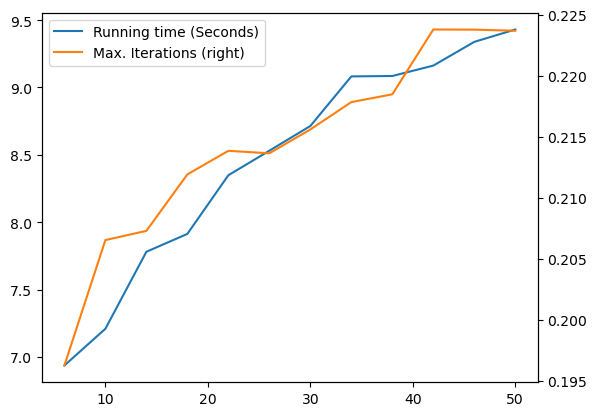

In [233]:
length.timings.plot(label = "Running time (Seconds)", legend = True)
coherence.coherence_values.plot(secondary_y = True, label = "Max. Iterations", legend = True)

# Source (Very good): https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
# Easy: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [ ]:
data_lemmatized

In [29]:
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

def gensim_gridsearch(data_lemmatized):
    
    coherence_values = []
    model_list = []
    parameters = pd.DataFrame(columns = ['alpha', 'eta', 'no_below', 'no_above', 'num_topics'])
    
    # I would probably remove the symetric stuff... or give a value to it to be able to plot the results 
    for alpha in [0.1, 0.4, 0.7, 1]: # 9 , 0.01, 0.3, 0.5, 0.7, 1
        for eta in [0.1, 0.4, 0.7, 1]: # 8 , 0.1, 0.3, 0.5, 0.7, 1
            for no_below in [0.01, 0.05, 0.1]: # 5
                for no_above in [0.90, 0.95, 1]: # 5
                    for num_topics in range(2, 13, 1):
                        
                        parameters.loc[-1] = [alpha, eta, no_below, no_above, num_topics]
                        parameters.index = parameters.index + 1
                        
                        id2word = Dictionary(data_lemmatized, prune_at = 1000000000)
                        id2word.filter_extremes(no_below = no_below, no_above = no_above, keep_n = None)
                        
                        # Create Corpus
                        texts = data_lemmatized
                        
                        # Term Document Frequency
                        corpus = [id2word.doc2bow(text) for text in texts]
                        
                        model = LdaMulticore(corpus = corpus, eta = eta, alpha = alpha, num_topics = num_topics, id2word = id2word, iterations = 14, random_state = 10,
                                            workers = 5)
                        model_list.append(model)
                        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = id2word, coherence = 'c_v')
                        coherence_values.append(coherencemodel.get_coherence())
                        
                        print(alpha, eta, no_below, no_above, num_topics)

    return model_list, coherence_values, parameters


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_list, coherence_values, parameters = gensim_gridsearch(data_lemmatized = data_lemmatized)

0.1 0.1 0.1 0.9 2
0.1 0.1 0.1 0.9 3
0.1 0.1 0.1 0.9 4
0.1 0.1 0.1 0.9 5
0.1 0.1 0.1 0.9 6
0.1 0.1 0.1 0.9 7
0.1 0.1 0.1 0.9 8
0.1 0.1 0.1 0.9 9
0.1 0.1 0.1 0.9 10
0.1 0.1 0.1 0.9 11
0.1 0.1 0.1 0.9 12
0.1 0.1 0.1 0.95 2
0.1 0.1 0.1 0.95 3
0.1 0.1 0.1 0.95 4
0.1 0.1 0.1 0.95 5
0.1 0.1 0.1 0.95 6
0.1 0.1 0.1 0.95 7
0.1 0.1 0.1 0.95 8
0.1 0.1 0.1 0.95 9
0.1 0.1 0.1 0.95 10
0.1 0.1 0.1 0.95 11
0.1 0.1 0.1 0.95 12
0.1 0.1 0.1 1 2
0.1 0.1 0.1 1 3
0.1 0.1 0.1 1 4
0.1 0.1 0.1 1 5
0.1 0.1 0.1 1 6
0.1 0.1 0.1 1 7
0.1 0.1 0.1 1 8
0.1 0.1 0.1 1 9
0.1 0.1 0.1 1 10
0.1 0.1 0.1 1 11
0.1 0.1 0.1 1 12
0.1 0.4 0.01 0.9 2
0.1 0.4 0.01 0.9 3
0.1 0.4 0.01 0.9 4
0.1 0.4 0.01 0.9 5
0.1 0.4 0.01 0.9 6
0.1 0.4 0.01 0.9 7


In [ ]:
parameters['Score'] = coherence_values
parameters.reset_index(drop = True)

In [ ]:

plot = parameters.reset_index(drop = True)

plot = plot.sort_values(['num_topics', 'Score'], ascending = [False, False]).groupby('num_topics').first()
plot = plot.reset_index()

# parameters = parameters.melt(id_vars = ['num_topics', 'Score'], value_vars=['alpha', 'eta', 'no_below', 'no_above'])

# a = gs['n_components'].unique().astype(int)
# results['component'] = np.concatenate((a, a))

plot

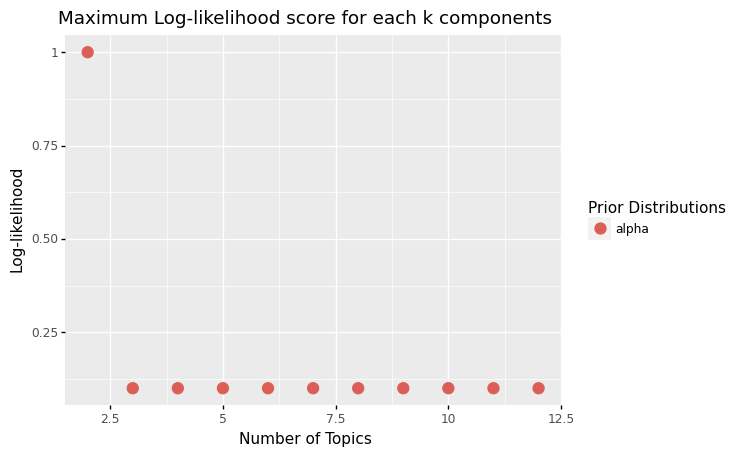

<ggplot: (134932299021)>

In [384]:

from plotnine.data import mpg
from plotnine import ggplot, aes, labs, geom_point, geom_line

(
    ggplot(plot)
    + aes(x = "num_topics", y = "value", color = "variable")
    + labs(
        title = "Maximum Log-likelihood score for each k components",
        subtitle = "dsa ceew cwe",
        caption = "Pere Fuster - UC3M",
        x = "Number of Topics",
        y = "Log-likelihood",
        color = "Prior Distributions")
    + geom_point(size = 4)
)


In [ ]:
coherence_values

In [30]:
list(np.linspace(0.01, 1.0, 2))
list(range(2, 3, 1))

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2]

In [ ]:
modelado.cv_results_['params']
modelado.cv_results_['mean_fit_time']
modelado.cv_results_

In [21]:
modelado.cv_results_['split0_test_score']
modelado.cv_results_['split2_test_score']
modelado.cv_results_['split3_test_score']
modelado.cv_results_['split4_test_score']

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-9609.44125831, -9400.47993503, -8839.5972764 , -8828.99159286])

In [ ]:

# search_params = {
#   'n_components': [2, 3, 4], # Number of components
#   'max_iter': range(2, 10), 
#   'doc_topic_prior': list(np.linspace(0.0, 1.0, 11)), # Alpha
#   'topic_word_prior': list(np.linspace(0.0, 1.0, 11)) # Eta
# }

# model = LatentDirichletAllocation(random_state = 0)
# gridsearch = GridSearchCV(model, param_grid = search_params, n_jobs = 7, verbose = 1)
# model = gridsearch.fit(tf)


## Analysis

In [22]:
modelado.best_params_

C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'vect__min_df': 0.1,
 'vect__max_df': 1.0,
 'clf__topic_word_prior': 0.2,
 'clf__n_components': 2,
 'clf__doc_topic_prior': 0.30000000000000004}

In [ ]:
gridsearch.get_params()

In [57]:
print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", model.best_score_)

Best Model's Params:  {'doc_topic_prior': 1.0, 'n_components': 2, 'topic_word_prior': 1.0}
Best Log Likelihood Score:  -83546.23916187364


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print("Log Likelihood Score: ", model.best_score_)

Log Likelihood Score:  -85976.11825406502


C:\Users\Carmen\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("Perplexity Score: ", model2.perplexity(tf))
print("Score: ", model2.score(tf))

## Analysis


In [ ]:
model2 = LatentDirichletAllocation(learning_method = 'online', random_state = 0, n_components = 2, learning_decay = 0.6)
model2.fit(tf)
sorting = np.argsort(model2.components_, axis = 1)[:, ::-1]

In [ ]:
feature_names = np.array(tf_vectorizer.get_feature_names())
feature_names

In [ ]:
# from gensim.models.coherencemodel import CoherenceModel
# CoherenceModel(model = model2, texts = tf)

In [ ]:
mglearn.tools.print_topics(topics = range(0,2), feature_names = feature_names, sorting = sorting, topics_per_chunk = 5, n_words = 20)

In [ ]:
# Review topic distribution across documents 

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

In [ ]:
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(model2, tf, tf_vectorizer, mds = 'tsne')
panel

In [ ]:
# This codes displays the dominant topic in each document

# Best Model
best_lda_model = model.best_estimator_

# Create Document - Topic Matrix
lda_output = best_lda_model.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

In [ ]:
texts = data[["Snippet"]].reset_index(drop=True).reset_index()
topics = df_document_topic.reset_index().reset_index()

del topics['index']
topics['index'] = topics['level_0']

In [ ]:
classification = pd.merge(texts, topics, left_on = 'index', right_on = 'level_0') 

In [ ]:
results = classification[['Snippet', 'Topic0', 'Topic1', 'dominant_topic']]
results.columns = ['News', 'Academia', 'I+D', 'Classificación']
results.head(10)

# Evaluation 

When do we know a model is better than another? 

Unsupervised Natural language is messy, ambiguous and full of subjective interpretation, and sometimes trying to cleanse ambiguity reduces the language to an unnatural form. 

### Perplexity (Log Likelihood Score)

It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set. 

However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated.

### Topic coherence 

The concept of topic coherence combines a number of measures into a framework to evaluate the coherence between topics inferred by a model.



# Gensim Application

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
no_features = 1000
# tf_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, max_features = no_features)
tf_vectorizer_tit = TfidfVectorizer(stop_words = stop_words, max_features = no_features)
tf_tit = tf_vectorizer_tit.fit_transform(data["Title"])
# tf = tf_vectorizer.fit_transform(tokenized)
tf_feature_names_tit = tf_vectorizer_tit.get_feature_names()

In [ ]:
# Quizás haya hiperparametros additionales que mejores la classificación

search_params = {
  'n_components': [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25],
  'learning_decay': [.1, .2, .3, .4, .5, .6, .7, .8, .9]
}

model_titles = LatentDirichletAllocation(learning_method = 'online', random_state = 0)
gridsearch = GridSearchCV(model_titles, param_grid = search_params, n_jobs = 6, verbose = 1)
model_titles = gridsearch.fit(tf_tit)

In [ ]:
# What did we find?
print("Best Model's Params: ", model_titles.best_params_)
print("Best Log Likelihood Score: ", model_titles.best_score_)

In [ ]:
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)


### Analysis

In [ ]:
model_tit_2 = LatentDirichletAllocation(learning_method = 'online', random_state = 0, n_components = 2, learning_decay = 0.7)
model_tit_2.fit(tf_tit)
sorting = np.argsort(model_tit_2.components_, axis = 1)[:, ::-1]

In [ ]:
feature_names = np.array(tf_vectorizer_tit.get_feature_names())

In [ ]:
mglearn.tools.print_topics(topics = range(0,2), feature_names = feature_names, sorting = sorting, topics_per_chunk = 5, n_words = 20)

In [ ]:
# Review topic distribution across documents 

df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name = "Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

In [ ]:
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(model_tit_2, tf_tit, tf_vectorizer_tit, mds = 'tsne')
panel

In [ ]:
texts = data[["Title"]].reset_index(drop=True).reset_index()
topics = df_document_topic.reset_index().reset_index()

del topics['index']
topics['index'] = topics['level_0']
classification = pd.merge(texts, topics, left_on = 'index', right_on = 'level_0') 
results = classification[['Title', 'Topic0', 'Topic1', 'dominant_topic']]
results.columns = ['News', '??', '??', 'Classificación']
results.head(10)